# Introduction to Time Series

#### Time series typically exhibit a property called serial correlation, which means that previous knowledge provides some knowledge about the future of the time series. We can measure serial correlation by comparing the current value of a time series to the previous values in the series to determine if present values are correlated with previous values. This type of correlation is also called autocorrelation. We will discuss more on autocorrelation later in this chapter, including how to determine if a series exhibits autocorrelation. Later in this chapter, we will look at how to make the calculations to determine whether data exhibits serial correlation and to calculate autocorrelation. However, let’s first discuss what we intend to achieve with time-series analysis.

#### There are two goals in time-series analysis:

- Identifying any patterns in the time series
- Forecasting future values of the time series

#### We can use time-series analysis methods to uncover the nature of a time series. At the most basic level, we may want to know if a series appears to be random or if a time series appears to exhibit a pattern. If a time series has a pattern, we can determine if it has seasonal behavior, cyclical patterns, or exhibits trending behavior. We will investigate the behaviors of time series both by observation and by the results of fitting models. Models can provide insight into the nature of a series and allow us to forecast the future values of a time series.

#### There are two types of processes generating time series; one is an ergodic process and the other is non-ergodic. An ergodic process has consistent output independent of time, whereas a non-ergodic process does not necessarily have consistent output over time. The sample mean of an ergodic process converges to the true population mean as the sample size increases. However, the sample mean of a non-ergodic process does not converge as the sample size increases; the sample mean of one end-to-end phase of a process’s output may not converge toward the process population mean similarly to the sample mean of another end-to-end phase of the same process.

#### In time-series analysis, the mean is commonly referred to as the signal. With respect to forecasting, the mean must be constant across time. We discussed in Chapter 6, Simple Linear Regression – as we will later in this chapter and in the next – the concept of first-order differencing, which is a low-pass linear filter used to remove high-frequency data from our output and pass through low-frequency data. When a signal is not constant, as when it is monotonically increasing or decreasing, for example, a first-order difference can often be applied—and repeated as needed—to produce a constant. This is one requirement of a stationary time series. We will discuss all components of stationarity in the Stationarity section of this chapter. Once a mean is constant, the variance around it can be assessed for autocorrelation. If autocorrelation exists within the variance around the mean, we can produce models to learn the patterns of the process producing it. We can also forecast the process’s future patterns. A model with a constant mean and no autocorrelation can often be forecasted with the mean using a white-noise model.

#### One common hypothesis test used in time-series analysis to assess if the variance in a series is white noise is the Ljung-Box test, created by Greta Ljung and George Box. The Ljung-Box test has the following hypotheses:

- H o : Data points are independently distributed with no serially correlated errors
- H a : Data points are not independently distributed and thus present serially correlated errors

#### This test can be applied to the residuals of any time-series model—for example, a linear model that uses time as an input or an autoregressive integrated moving average (ARIMA) model. If the result of the Ljung-Box test is the validation of the null hypothesis, the model tested is assumed to be valid. If the null hypothesis is rejected, a different model may be required.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
random_white_noise = np.random.normal(loc=0, scale=1, size=1000)

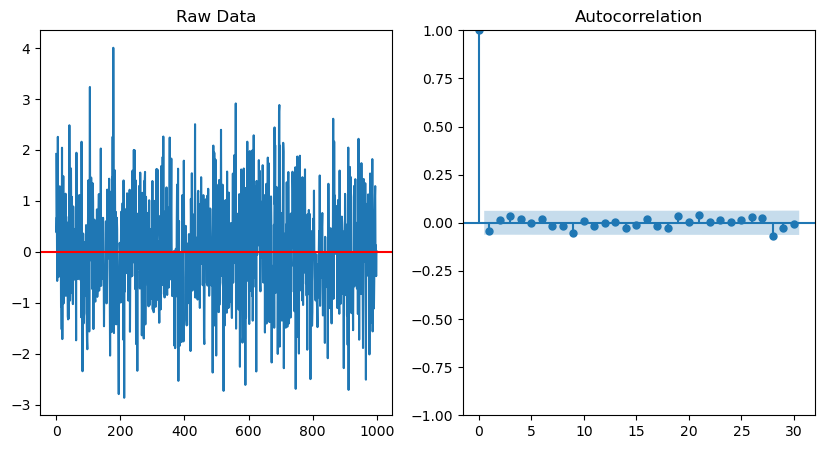

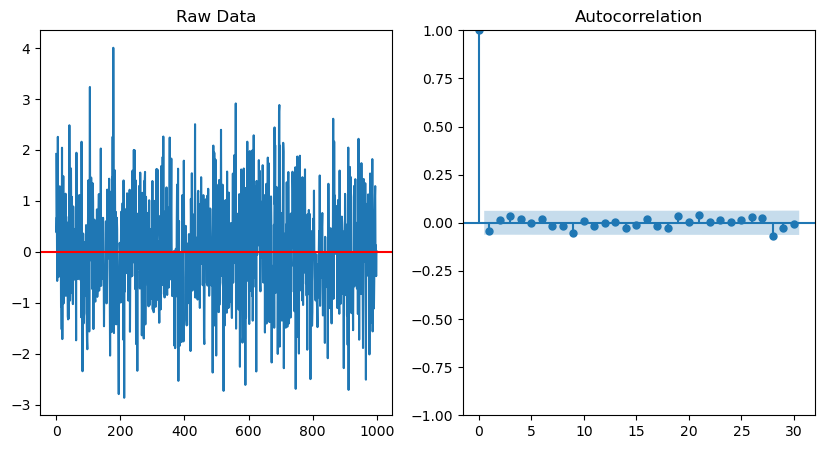

In [5]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].plot(random_white_noise)
ax[0].axhline(0, color='r')
ax[0].set_title('Raw Data')
plot_acf(random_white_noise, ax=ax[1])

In [6]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(random_white_noise, lags=[50], return_df=True)

,lb_stat,lb_pvalue
50,44.099879,0.708001


## Autocorrelation

#### As we’ve mentioned to this point, autocorrelation, also called serial correlation, is a measure of correlation for a given point corresponding to previous points in the time-constrained sequence of data. It is called “auto” as it refers to a variable’s correlation with itself at a previous lag. Autocorrelation across all preceding lags in the specified horizon—as opposed to for a specific lag—is referred to as autocorrelation structure.

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
df = sm.datasets.macrodata.load().data
df['realinv'] = round(df['realinv'].astype('float32'), 2)
df['realdpi'] = round(df['realdpi'].astype('float32'), 2)
df_mod = df[['realinv','realdpi']]

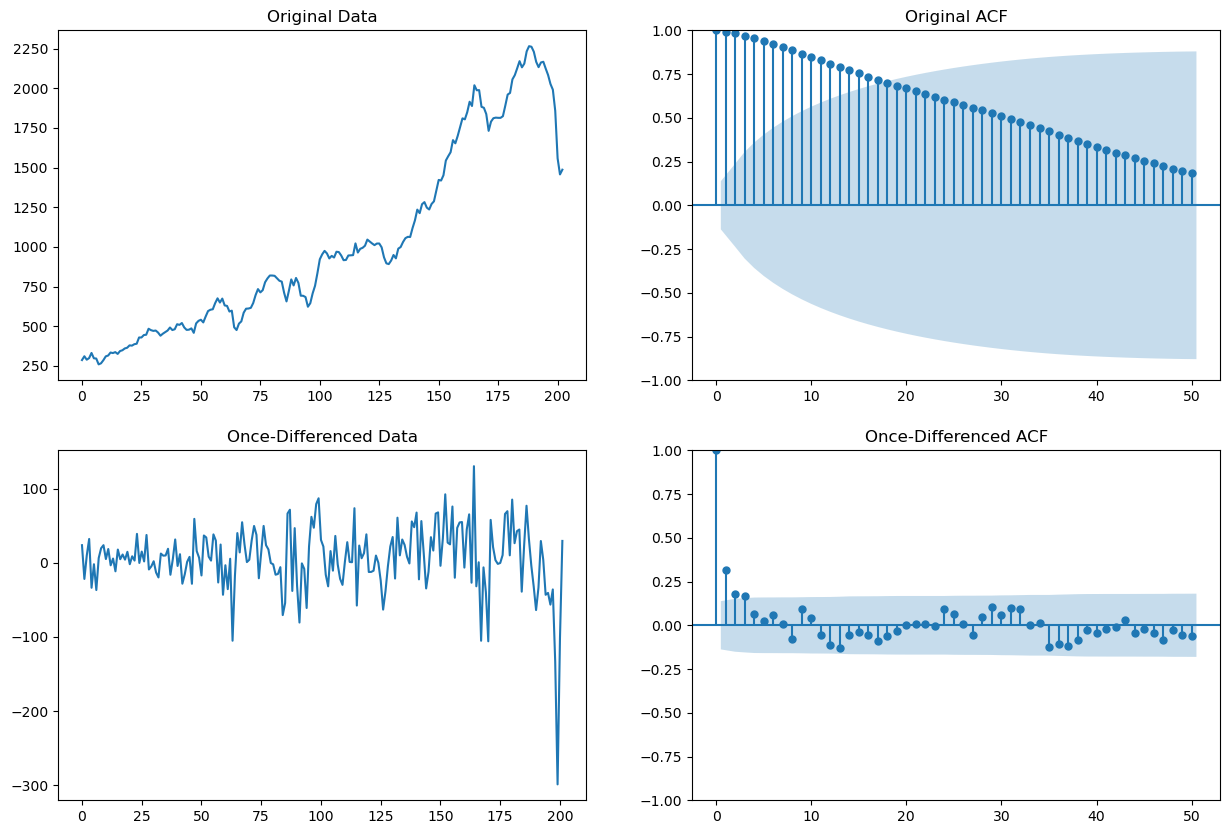

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(2,2, figsize=(15,10))
plot_acf(df_mod['realinv'], alpha=0.05, lags=50, ax=ax[0,1])
ax[0,1].set_title('Original ACF')
ax[0,0].set_title('Original Data')
ax[0,0].plot(df_mod['realinv'])
plot_acf(np.diff(df_mod['realinv'], n=1), alpha=0.05, lags=50, ax=ax[1,1])
ax[1,1].set_title('Once-Differenced ACF')
ax[1,0].set_title('Once-Differenced Data')
ax[1,0].plot(np.diff(df_mod['realinv'], n=1))

In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
df = sm.datasets.macrodata.load().data
df['realinv'] = round(df['realinv'].astype('float32'), 2)
df['realdpi'] = round(df['realdpi'].astype('float32'), 2)
df_mod = df[['realinv','realdpi']]

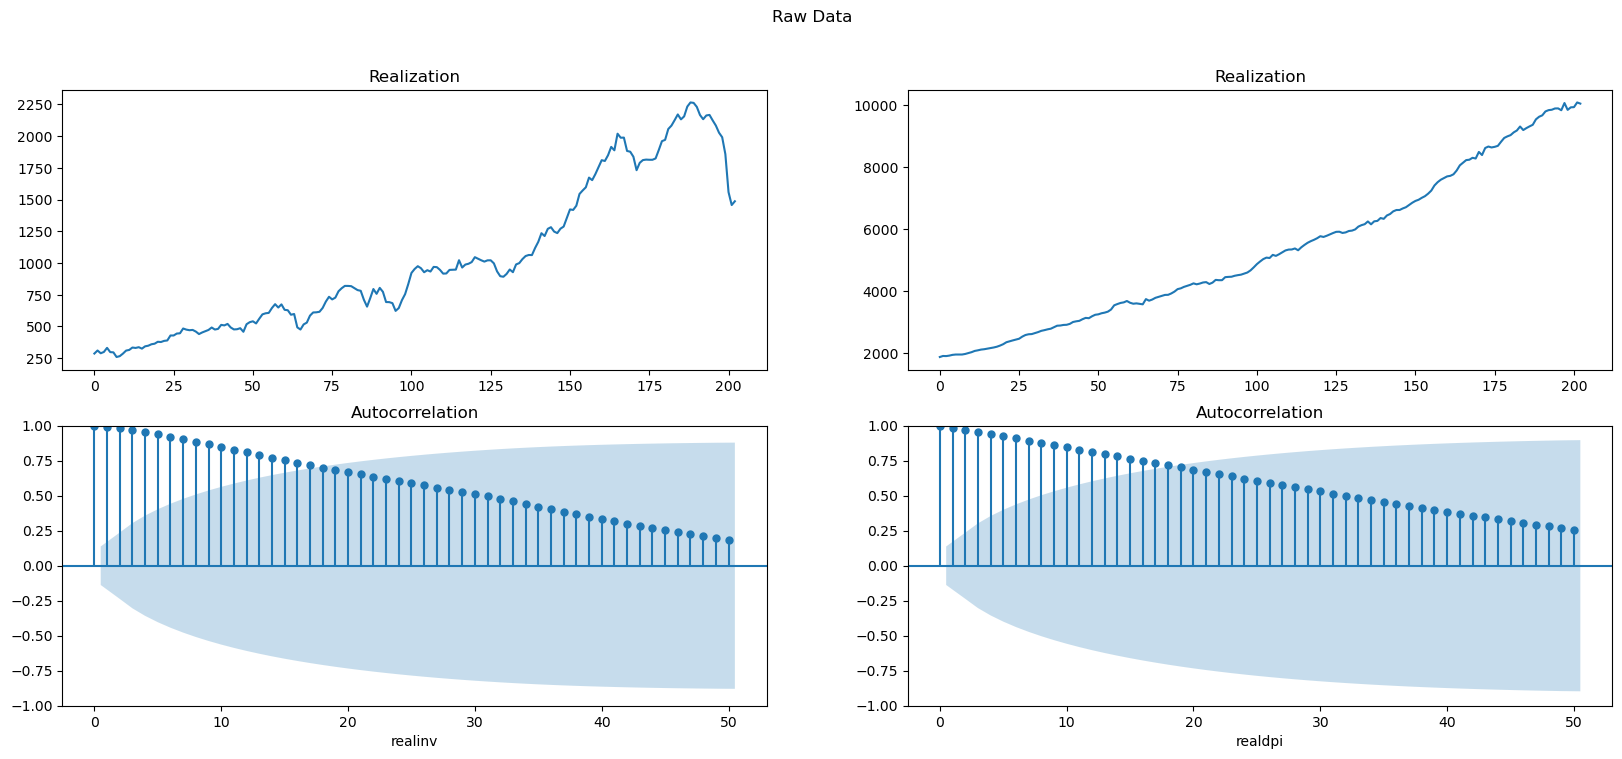

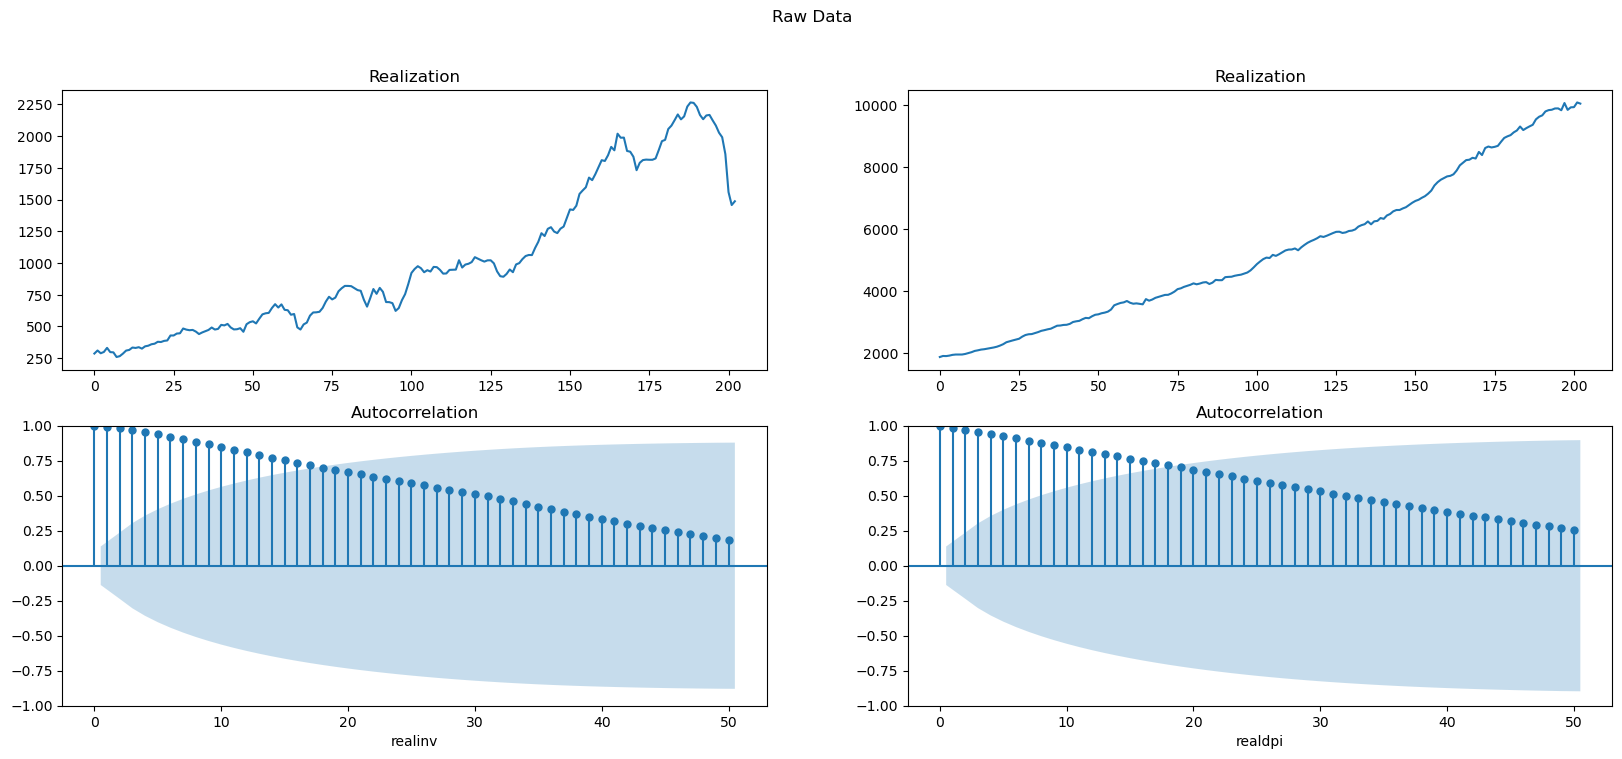

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(2,2, figsize=(20,8))
fig.suptitle('Raw Data')
ax[0,0].plot(df_mod['realinv'])
ax[0,0].set_title('Realization')
ax[1,0].set_xlabel('realinv')
ax[0,1].plot(df_mod['realdpi'])
ax[0,1].set_title('Realization')
ax[1,1].set_xlabel('realdpi')
plot_acf(df_mod['realinv'], alpha=0.05, lags=50, ax=ax[1,0])
plot_acf(df_mod['realdpi'], alpha=0.05, lags=50, ax=ax[1,1])

In [11]:
df_diff = pd.DataFrame()
df_diff['realinv'] = np.diff(df_mod['realinv'], n=1)
df_diff['realdpi'] = np.diff(df_mod['realdpi'], n=1)